## Surface spatial distribution

In [1]:
import xarray as xr
import numpy as np
import matplotlib.pyplot as plt
from matplotlib.lines import Line2D
import cartopy.crs as ccrs
import matplotlib.gridspec as gridspec
import cartopy.feature as cfeature
import math

In [2]:
datadir = '/scratch/rfischer/Kooi_data/data_output/'

In [3]:
regions = {'EqPac': 'Equatorial Pacific',
           'GPGP': 'Great Pacific Garbage Patch',
           'SO': 'Southern Ocean',
           'NPSG': 'North Pacific Subtropical Gyre'}

In [57]:
# mort_cmap = copy(plt.get_cmap('RdPu'))
mort_cmap = ['#FF7917','#14FF37', '#732FFF']
mixing_cmap = ['firebrick','seagreen','purple']
w_vel_cmap = ['salmon', 'lime', 'cornflowerblue', 'gold']
r_pl_clist = ['#7a0177', '#fbb4b9'] #, '#c51b8a', '#f768a1','#feebe2'
r_pl_cmap = plt.get_cmap('RdPu_r')
region_cmap = ['teal', 'darkorange', '#9AE19D']

In [12]:
region = ['EqPac','NPSG', 'SO']
mortality = 0.39              # [d-1]
runtime = 80                  # [days]
dt = 60                       # [seconds]
outputdt = 12                 # [hours]
mixing = 'markov_0_KPP_reflect_tidal'
sizebinedges = [1e-3, 1e-4, 1e-5]
res ='1x1'

In [8]:
ds_0 = xr.open_dataset(datadir+'regional_'+region[0]+'_bfadv_Jan_2004_0'+res+'res_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_1 = xr.open_dataset(datadir+'regional_'+region[1]+'_bfadv_Jan_2004_0'+res+'res_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')
ds_2 = xr.open_dataset(datadir+'regional_'+region[2]+'_bfadv_Jan_2004_0'+res+'res_'+mixing+'mixing_'+str(runtime)+'days_'+str(dt)+'dtsecs_'+str(outputdt)+'hrsoutdt.nc')

In [9]:
dslist = [ds_0, ds_1, ds_2]

In [20]:
number_of_trajectories_to_plot = 200
n_plt = number_of_trajectories_to_plot
f_plt = int(np.round(len(ds_0['traj'])/n_plt))
print('plotting '+str(n_plt)+' of '+str(len(ds_0['traj']))+' trajectories')
print('plotting every '+str(f_plt)+' particles')

plotting 200 of 10000 trajectories
plotting every 50 particles


In [37]:
ds['r_pl']

<xarray.DataArray 'r_pl' (traj: 10000)>
array([1.e-05, 1.e-05, 1.e-05, ..., 1.e-03, 1.e-03, 1.e-03], dtype=float32)
Dimensions without coordinates: traj
Attributes:
    long_name:      
    standard_name:  r_pl
    units:          unknown

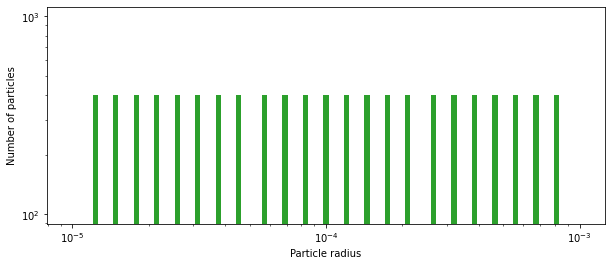

In [11]:
fig = plt.figure(figsize=(10,4)),
ax=plt.axes()
for ds in dslist:
    ax.hist(ds['r_pl'],np.logspace(math.floor(np.log10(ds['r_pl'].min())),math.ceil(np.log10(ds['r_pl'].max())),100))
ax.set_xscale('log')
ax.set_yscale('log')
ax.set_ylabel('Number of particles')
ax.set_xlabel('Particle radius')
plt.show()

In [13]:
split_ds_0 = list(ds_0.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_1 = list(ds_1.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_ds_2 = list(ds_2.groupby_bins('r_pl',sizebinedges[::-1]))[::-1]
split_dslist = [split_ds_0, split_ds_1]

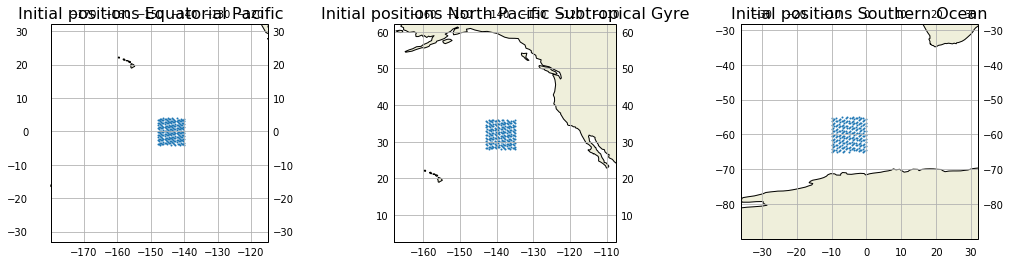

In [11]:
fig = plt.figure(figsize=(18,4))

gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2],projection=ccrs.PlateCarree())
axes = [ax1, ax2, ax3]

for i, ax in enumerate(axes):
    ax.set_title('Initial positions '+ regions[region[i]], fontsize=16)
    ax.scatter(dslist[i]['lon'][::f_plt,0],dslist[i]['lat'][::f_plt,0],s=1)
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    ax.set_ylim(np.min(dslist[i]['lat'])-25,np.max(dslist[i]['lat'])+25)
    ax.set_xlim(np.min(dslist[i]['lon'])-25,np.max(dslist[i]['lon'])+25)
# plt.show()

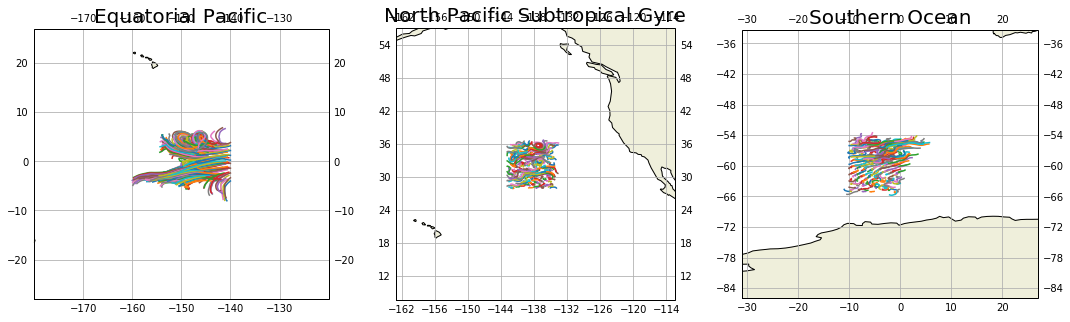

In [12]:
fig = plt.figure(figsize=(18,5))
gs = gridspec.GridSpec(ncols=3, nrows=1, figure=fig)
ax1 = fig.add_subplot(gs[0, 0],projection=ccrs.PlateCarree())
ax2 = fig.add_subplot(gs[0, 1],projection=ccrs.PlateCarree())
ax3 = fig.add_subplot(gs[0, 2],projection=ccrs.PlateCarree())
axes = [ax1, ax2, ax3]

for i, ax in enumerate(axes):
    ax.set_title(regions[region[i]], fontsize=20)

    ax.plot(dslist[i]['lon'].T[:,::f_plt],dslist[i]['lat'].T[:,::f_plt])
    ax.coastlines()
    ax.add_feature(cfeature.LAND)
    
    gl = ax.gridlines(draw_labels=True)
    gl.top_labels = False
    gl.right_labels = False

    ax.set_ylim(np.min(dslist[i]['lat'])-20,np.max(dslist[i]['lat'])+20)
    ax.set_xlim(np.min(dslist[i]['lon'])-20,np.max(dslist[i]['lon'])+20)
plt.show()

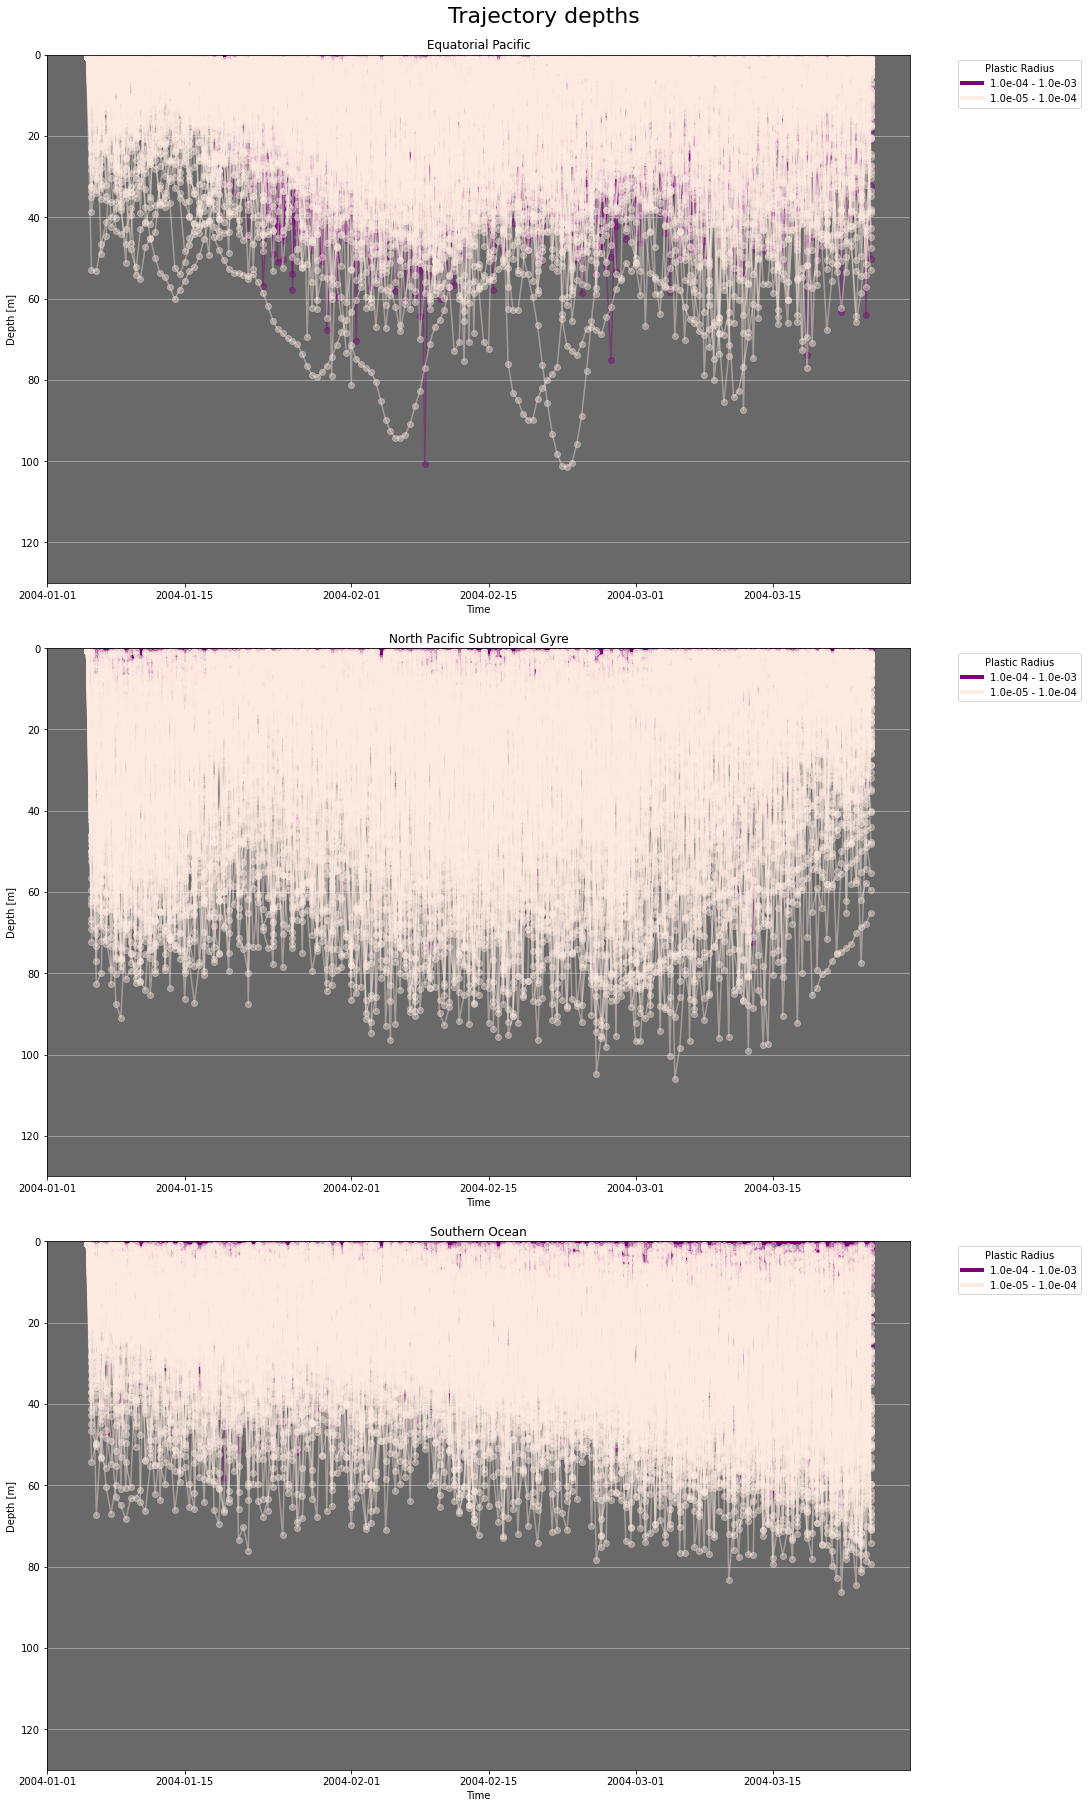

In [34]:
fig, (ax1, ax2, ax3) = plt.subplots(3,1,figsize=(15,25), constrained_layout=True)
fig.suptitle('Trajectory depths', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)
    
ax1.set_title(regions[region[0]])
ax1.set_ylabel('Depth [m]')
ax1.set_xlabel('Time')
ax1.set_facecolor('dimgray')
ax1.set_ylim(130,0)
ax1.grid(b=True, axis='y')

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),]

ax1.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')


for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)    

ax2.set_title(regions[region[1]])
ax2.set_ylabel('Depth [m]')
ax2.set_xlabel('Time')
ax2.set_facecolor('dimgray')
ax2.set_ylim(130,0)
ax2.grid(b=True, axis='y')

ax2.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,::f_plt], r[1]['z'].T[:,::f_plt], marker='o', markersize=6, c=r_pl_clist[i], alpha=0.4)
    
ax3.set_title(regions[region[2]])
ax3.set_ylabel('Depth [m]')
ax3.set_xlabel('Time')
ax3.set_facecolor('dimgray')
ax3.set_ylim(130,0)
ax3.grid(b=True, axis='y')

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')

plt.show()

In [16]:
w_bins = [-1e0, -1e-1, -1e-2, -1e-3, -1e-4, -1e-5, 1e-5, 1e-4, 1e-3, 1e-2, 1e-1, 1e0]
w_bincenters = [-2e-1, -2e-2, -2e-3, -2e-4, -2e-5, 0, 2e-5, 2e-4, 2e-3, 2e-2, 2e-1]
w_list = ['w_m', 'vs_init', 'w_adv', 'w_m_b']
w_list_names = ['KPP Wind mixing', 'Potential settling velocity', 'Model advection',  'Tidal mixing']
w_pdf = np.zeros((len(dslist),len(w_list),len(w_bins)-1))
linestyles=['-','-.']

for i,ds in enumerate(dslist):
    for j,w in enumerate(w_list):
        vals, bins = np.histogram(ds[w], w_bins)
        w_pdf[i,j,:] = vals/ds[w].size

In [17]:
w_widths = np.ones(w_pdf.shape[2])
w_centers = np.arange(w_pdf.shape[2])
w_edges = np.arange(w_pdf.shape[2]+1)-0.5
w_bin_str = [np.format_float_scientific(w,2,exp_digits=1) for w in w_bins]

In [18]:
w_pdf_sizes = np.zeros((len(dslist),len(w_list),len(sizebinedges)-1,len(w_bins)-1))

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for j,w in enumerate(w_list):
        for k,ds_r in enumerate(split_ds):
            vals, bins = np.histogram(ds_r[1][w], w_bins)
            w_pdf_sizes[i,j,k,:] = vals/ds_r[1][w].size

In [19]:
w_pdf_sizes.shape

(3, 4, 2, 11)

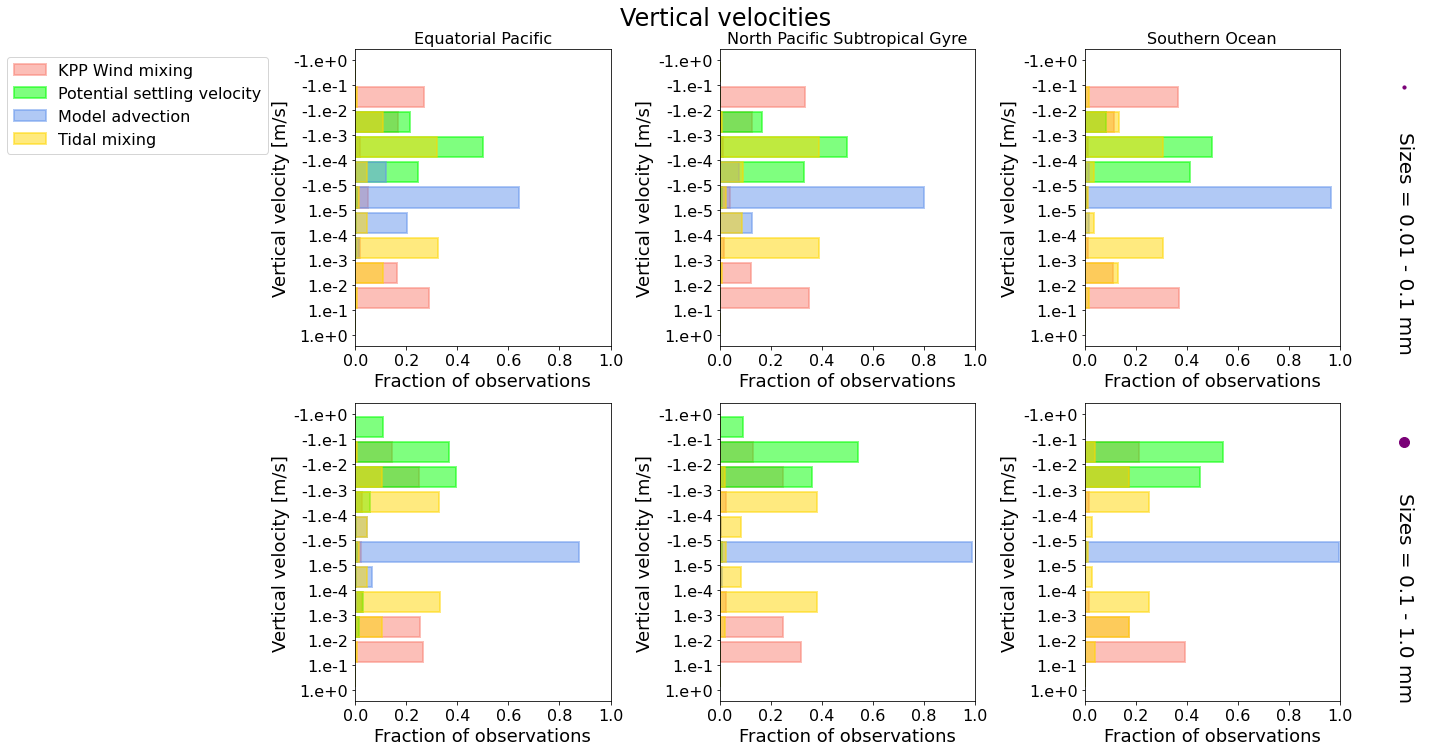

In [72]:
fig = plt.figure(figsize=(20,10),constrained_layout=True)
fig.suptitle('Vertical velocities', fontsize=24, y=1.03)
gs = gridspec.GridSpec(ncols=4, nrows=2, width_ratios=[1,1,1,0.3],figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
ax9 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 2])
ax13 = fig.add_subplot(gs[0, 3])
ax14 = fig.add_subplot(gs[1, 3])
axes = [[ax1, ax2], [ax5, ax6], [ax9, ax10], [ax13, ax14]]

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        for j,w in enumerate(w_list):
            axes[i][k].barh(w_centers, w_pdf_sizes[i,j,k], align='center', alpha=0.5, color=w_vel_cmap[j], edgecolor=w_vel_cmap[j], linewidth=2, label=w_list_names[j])
        axes[i][k].set_xlim(0,1.)
        axes[i][k].set_yticks(w_edges)
        axes[i][k].set_yticklabels(w_bin_str)
        axes[i][k].invert_yaxis()
        axes[i][k].tick_params(axis='both', labelsize=16)
        axes[i][k].set_xlabel('Fraction of observations', fontsize=18)
        axes[i][k].set_ylabel('Vertical velocity [m/s]', fontsize=18)
    axes[i][0].set_title(regions[region[i]], fontsize=16)
    
split_ds = list(dslist[0].groupby_bins('r_pl',sizebinedges[::-1]))
for k, ds_r in enumerate(split_ds):
    axes[3][k].scatter(0.5,0.87,s=sizebinedges[-k-1]*1000000,color=r_pl_clist[0])
    axes[3][k].set_ylim(0,1)
    axes[3][k].text(0.5,0.35,'Sizes = '+ str(ds_r[0].left*1000)+' - '+str(ds_r[0].right*1000)+' mm',rotation=270,fontsize=20, horizontalalignment='center',verticalalignment='center')
    axes[3][k].axis('off')
axes[0][0].legend(fontsize=16, bbox_to_anchor=(-0.31, 1))

In [52]:

fifth_d_phy = np.nanpercentile(ds_0['d_phy'], 5)
ninetyfifth_d_phy = np.nanpercentile(ds_0['d_phy'], 95)
# ax.plot([fifth_d_phy,ninetyfifth_d_phy], [np.mean(ds_0['tpp3']),np.mean(ds_0['tpp3'])], color='k')
# ax.scatter([fifth_d_phy,ninetyfifth_d_phy],[np.mean(ds_0['tpp3']),np.mean(ds_0['tpp3'])],marker='|', color='k')
print(fifth_d_phy)
print(ninetyfifth_d_phy)

0.03084857575595379
0.20519055426120758


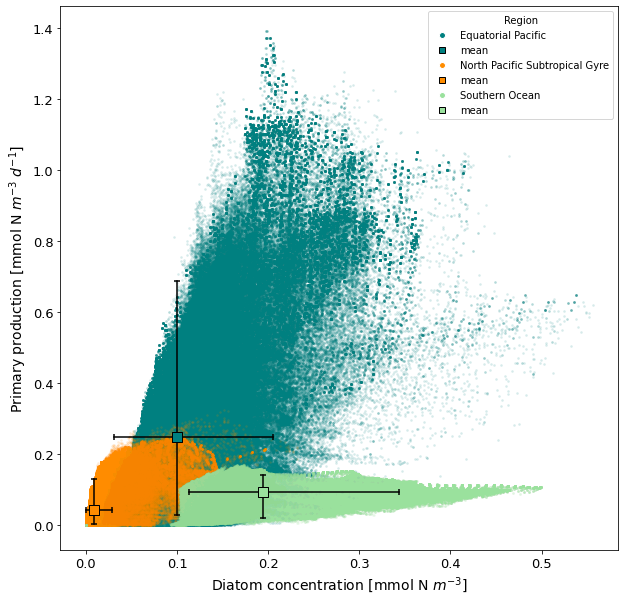

In [55]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes()

for i, ds in enumerate(dslist):
    ax.scatter(ds['d_phy'], ds['tpp3'], c= region_cmap[i], s=3, alpha=0.1,label=regions[region[i]],zorder=0)
    
for i, ds in enumerate(dslist):
    fifth_d_phy = np.nanpercentile(ds['d_phy'], 5)
    ninetyfifth_d_phy = np.nanpercentile(ds['d_phy'], 95)
    ax.plot([fifth_d_phy,ninetyfifth_d_phy], [np.mean(ds['tpp3']),np.mean(ds['tpp3'])], color='k',zorder=1)
    ax.scatter([fifth_d_phy,ninetyfifth_d_phy],[np.mean(ds['tpp3']),np.mean(ds['tpp3'])],marker='|', color='k',zorder=1)
    
    fifth_tpp3 = np.nanpercentile(ds['tpp3'], 5)
    ninetyfifth_tpp3 = np.nanpercentile(ds['tpp3'], 95)
    ax.plot([np.mean(ds['d_phy']),np.mean(ds['d_phy'])],[fifth_tpp3,ninetyfifth_tpp3], color='k',zorder=1)
    ax.scatter([np.mean(ds['d_phy']),np.mean(ds['d_phy'])],[fifth_tpp3,ninetyfifth_tpp3],marker='_', color='k',zorder=1)
    
    ax.scatter(np.mean(ds['d_phy']), np.mean(ds['tpp3']), c= region_cmap[i], marker='s',s=100, edgecolor ='k',label='mean '+regions[region[i]],zorder=2)
    
ax.tick_params(axis='both', labelsize=13)
ax.set_ylabel('Primary production [mmol N $m^{-3}$ $d^{-1}$]', fontsize=14)
ax.set_xlabel('Diatom concentration [mmol N $m^{-3}$]', fontsize=14)

custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[0]),
                Line2D([0], [0], marker='s', color='w', markerfacecolor=region_cmap[0], markeredgecolor='k'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[1]),
                Line2D([0], [0], marker='s', color='w', markerfacecolor=region_cmap[1], markeredgecolor='k'),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[2]),
                Line2D([0], [0], marker='s', color='w', markerfacecolor=region_cmap[2], markeredgecolor='k')]

ax.legend(custom_lines, [regions[region[0]], 'mean', regions[region[1]], 'mean', regions[region[2]], 'mean'], title='Region', loc='upper right')

In [ ]:
r = 2e-16**(1/3)
print(f'Diatom radius = {r} m = {np.round(r*1000000,2)} um')

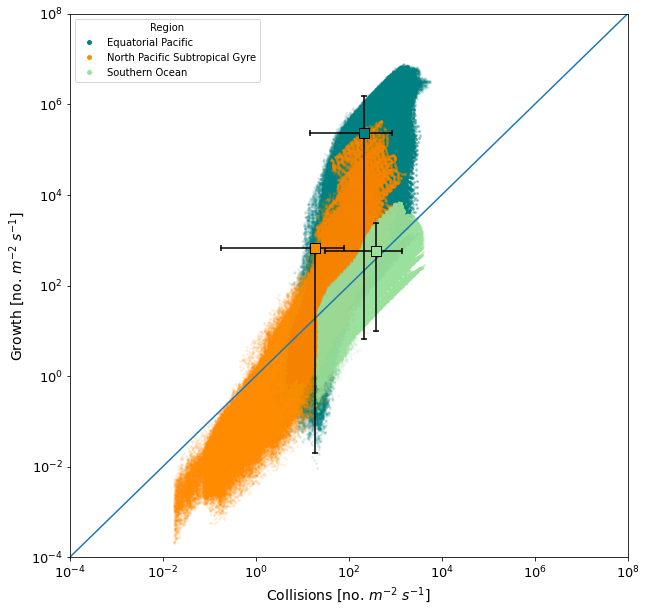

In [59]:
fig = plt.figure(figsize=(10,10))
ax=plt.axes()

for i, ds in enumerate(dslist):
    ax.scatter(ds['a_coll'], ds['a_growth'], c= region_cmap[i], s=3, alpha=0.1,label=regions[region[i]], zorder=0)
    
for i, ds in enumerate(dslist):
    fifth_a_coll = np.nanpercentile(ds['a_coll'], 5)
    ninetyfifth_a_coll = np.nanpercentile(ds['a_coll'], 95)
    ax.plot([fifth_a_coll,ninetyfifth_a_coll], [np.mean(ds['a_growth']),np.mean(ds['a_growth'])], color='k',zorder=2)
    ax.scatter([fifth_a_coll,ninetyfifth_a_coll],[np.mean(ds['a_growth']),np.mean(ds['a_growth'])],marker='|', color='k',zorder=2)
    
    fifth_a_growth = np.nanpercentile(ds['a_growth'], 5)
    ninetyfifth_a_growth = np.nanpercentile(ds['a_growth'], 95)
    ax.plot([np.mean(ds['a_coll']),np.mean(ds['a_coll'])],[fifth_a_growth,ninetyfifth_a_growth], color='k',zorder=2)
    ax.scatter([np.mean(ds['a_coll']),np.mean(ds['a_coll'])],[fifth_a_growth,ninetyfifth_a_growth],marker='_', color='k',zorder=2)
    
    ax.scatter(np.mean(ds['a_coll']), np.mean(ds['a_growth']), c= region_cmap[i], marker='s',s=100, edgecolor ='k',label='mean '+regions[region[i]],zorder=3)

ax.tick_params(axis='both', labelsize=13)
ax.set_ylabel('Growth [no. $m^{-2}$ $s^{-1}$]', fontsize=14)
ax.set_xlabel('Collisions [no. $m^{-2}$ $s^{-1}$]', fontsize=14)
ax.set_xscale('log')
ax.set_yscale('log')

ax.set_ylim(1e-4,1e8)
ax.set_xlim(1e-4,1e8)

ax.plot(np.linspace(1e-4,1e8),np.linspace(1e-4,1e8),zorder=1)

custom_lines = [Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[0]),
                Line2D([0], [0], marker='o', color='w', markerfacecolor=region_cmap[1]),
                Line2D([0], [0], marker='o',  color='w', markerfacecolor=region_cmap[2])]

ax.legend(custom_lines, [regions[region[0]], regions[region[1]], regions[region[2]]], title='Region', loc='upper left')

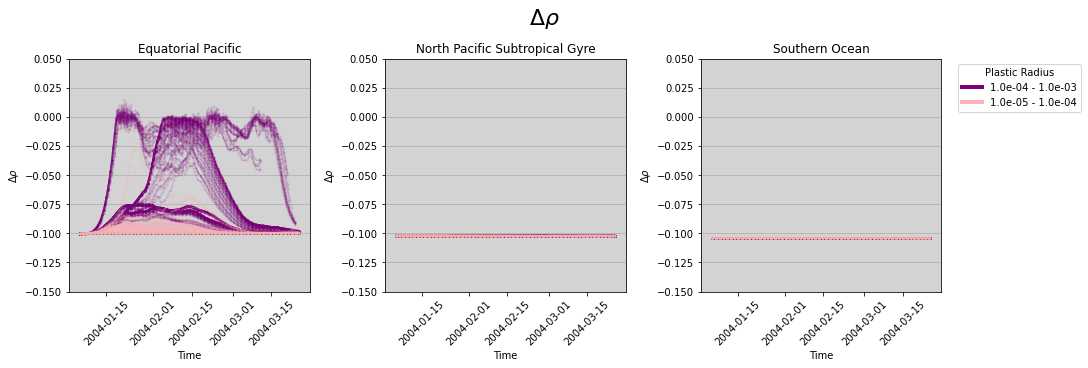

In [66]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('$\\Delta \\rho$', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title(regions[region[0]])
ax1.set_ylabel('$\\Delta \\rho$')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-0.15,0.05)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1, c=r_pl_clist[i], alpha = 0.1)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title(regions[region[1]])
ax2.set_ylabel('$\\Delta \\rho$')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-0.15,0.05)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title(regions[region[2]])
ax3.set_ylabel('$\\Delta \\rho$')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-0.15,0.05)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

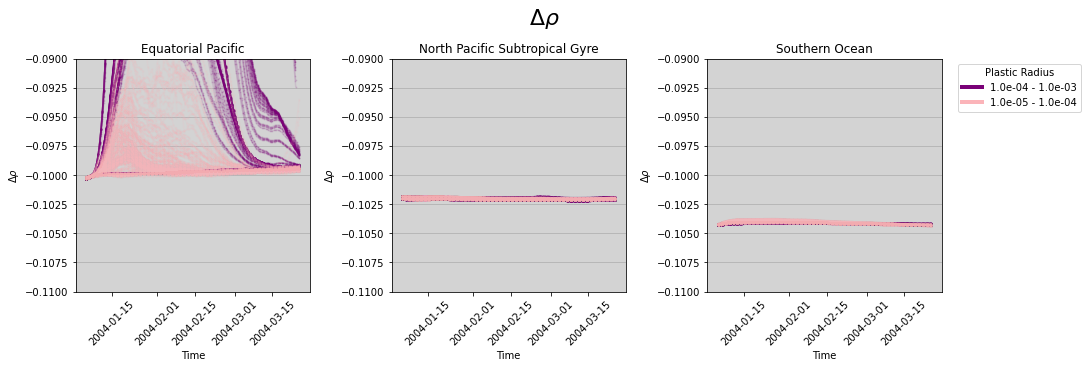

In [64]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('$\\Delta \\rho$', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title(regions[region[0]])
ax1.set_ylabel('$\\Delta \\rho$')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_ylim(-0.11,-0.09)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1, c=r_pl_clist[i], alpha = 0.1)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title(regions[region[1]])
ax2.set_ylabel('$\\Delta \\rho$')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_ylim(-0.11,-0.09)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[1:,:n_plt], r[1]['delta_rho'].T[1:,:n_plt], marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title(regions[region[2]])
ax3.set_ylabel('$\\Delta \\rho$')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_ylim(-0.11,-0.09)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

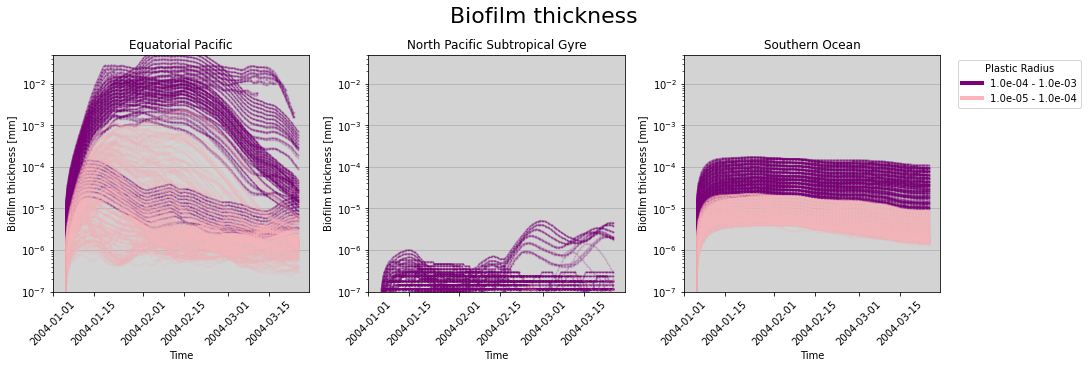

In [62]:
fig, (ax1, ax2, ax3) = plt.subplots(1,3,figsize=(15,5), constrained_layout=True)
fig.suptitle('Biofilm thickness', fontsize=22)

for i, r in enumerate(split_ds_0):
    ax1.plot(r[1]['time'].T[:,:n_plt], (r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt])*1000, marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
ax1.set_facecolor('lightgray')
ax1.grid(b=True, axis='y')
ax1.set_title(regions[region[0]])
ax1.set_ylabel('Biofilm thickness [mm]')
ax1.set_xlabel('Time')
ax1.tick_params(axis='x', rotation=45)
ax1.set_yscale('log')
ax1.set_ylim(1e-7,5e-2)

for i, r in enumerate(split_ds_1):
    ax2.plot(r[1]['time'].T[:,:n_plt], (r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt])*1000, marker='o', markersize=1, c=r_pl_clist[i], alpha = 0.1)
ax2.set_facecolor('lightgray')
ax2.grid(b=True, axis='y')
ax2.set_title(regions[region[1]])
ax2.set_ylabel('Biofilm thickness [mm]')
ax2.set_xlabel('Time')
ax2.tick_params(axis='x', rotation=45)
ax2.set_yscale('log')
ax2.set_ylim(1e-7,5e-2)

for i, r in enumerate(split_ds_2):
    ax3.plot(r[1]['time'].T[:,:n_plt], (r[1]['r_tot'].T[:,:n_plt] - r[1]['r_pl'].T[:n_plt])*1000, marker='o', markersize=1,c=r_pl_clist[i], alpha = 0.1)
ax3.set_facecolor('lightgray')
ax3.grid(b=True, axis='y')
ax3.set_title(regions[region[2]])
ax3.set_ylabel('Biofilm thickness [mm]')
ax3.set_xlabel('Time')
ax3.tick_params(axis='x', rotation=45)
ax3.set_yscale('log')
ax3.set_ylim(1e-7,5e-2)

custom_lines = [Line2D([0], [0], color=r_pl_clist[0], lw=4),
                Line2D([0], [0], color=r_pl_clist[1], lw=4),]

ax3.legend(custom_lines, ["{left:.1e} - {right:.1e}".format(left=split_ds_1[0][0].left, right=split_ds_1[0][0].right), "{left:.1e} - {right:.1e}".format(left=split_ds_1[1][0].left, right=split_ds_1[1][0].right)], title='Plastic Radius', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

In [70]:
ds_0

<xarray.Dataset>
Dimensions:     (obs: 161, traj: 10000)
Dimensions without coordinates: obs, traj
Data variables:
    trajectory  (traj, obs) float64 ...
    time        (traj, obs) datetime64[ns] ...
    lat         (traj, obs) float64 ...
    lon         (traj, obs) float64 ...
    z           (traj, obs) float64 ...
    u           (traj, obs) float32 ...
    v           (traj, obs) float32 ...
    w           (traj, obs) float32 ...
    w_adv       (traj, obs) float32 0.0 5.194781e-06 ... 3.6177557e-06
    tpp3        (traj, obs) float32 0.0 0.07260318 ... 0.06932722 0.29243848
    d_phy       (traj, obs) float32 0.0 0.08708273 ... 0.10352385 0.10796509
    nd_phy      (traj, obs) float32 ...
    a           (traj, obs) float32 ...
    a_coll      (traj, obs) float32 0.0 17.984066 ... 1081.3057 1131.3706
    a_growth    (traj, obs) float32 0.0 1.4232379 ... 810292.4 3308425.8
    a_resp      (traj, obs) float32 ...
    vs          (traj, obs) float32 ...
    w_m         (traj, obs) float32 0.0 0.0050663655 ... -0.025242917 -0.0391385
    w_m_b       (traj, obs) float32 0.0 -0.0023090742 ... -0.0008485031
    mld         (traj, obs) float32 ...
    rho_tot     (traj, obs) float32 ...
    r_tot       (traj, obs) float32 ...
    delta_rho   (traj, obs) float32 ...
    vs_init     (traj, obs) float32 0.0 -2.501283e-05 ... -0.0040754345
    KPP         (traj, obs) float32 ...
    K_z_t       (traj, obs) float32 ...
    dK_z_t      (traj, obs) float32 ...
    tau         (traj, obs) float32 ...
    w10         (traj, obs) float32 ...
    r_pl        (traj) float32 1e-05 1e-05 1e-05 1e-05 ... 0.001 0.001 0.001
    rho_pl      (traj) float32 ...
Attributes:
    feature_type:           trajectory
    Conventions:            CF-1.6/CF-1.7
    ncei_template_version:  NCEI_NetCDF_Trajectory_Template_v2.0
    parcels_version:        2.2.2.dev380+gdc6262e2
    parcels_mesh:           spherical
    collision efficiency:   1.0
    mortality rate:         0.39
    background mixing:      tidal

In [ ]:
plt.scatter(ds_0['rho_w'])

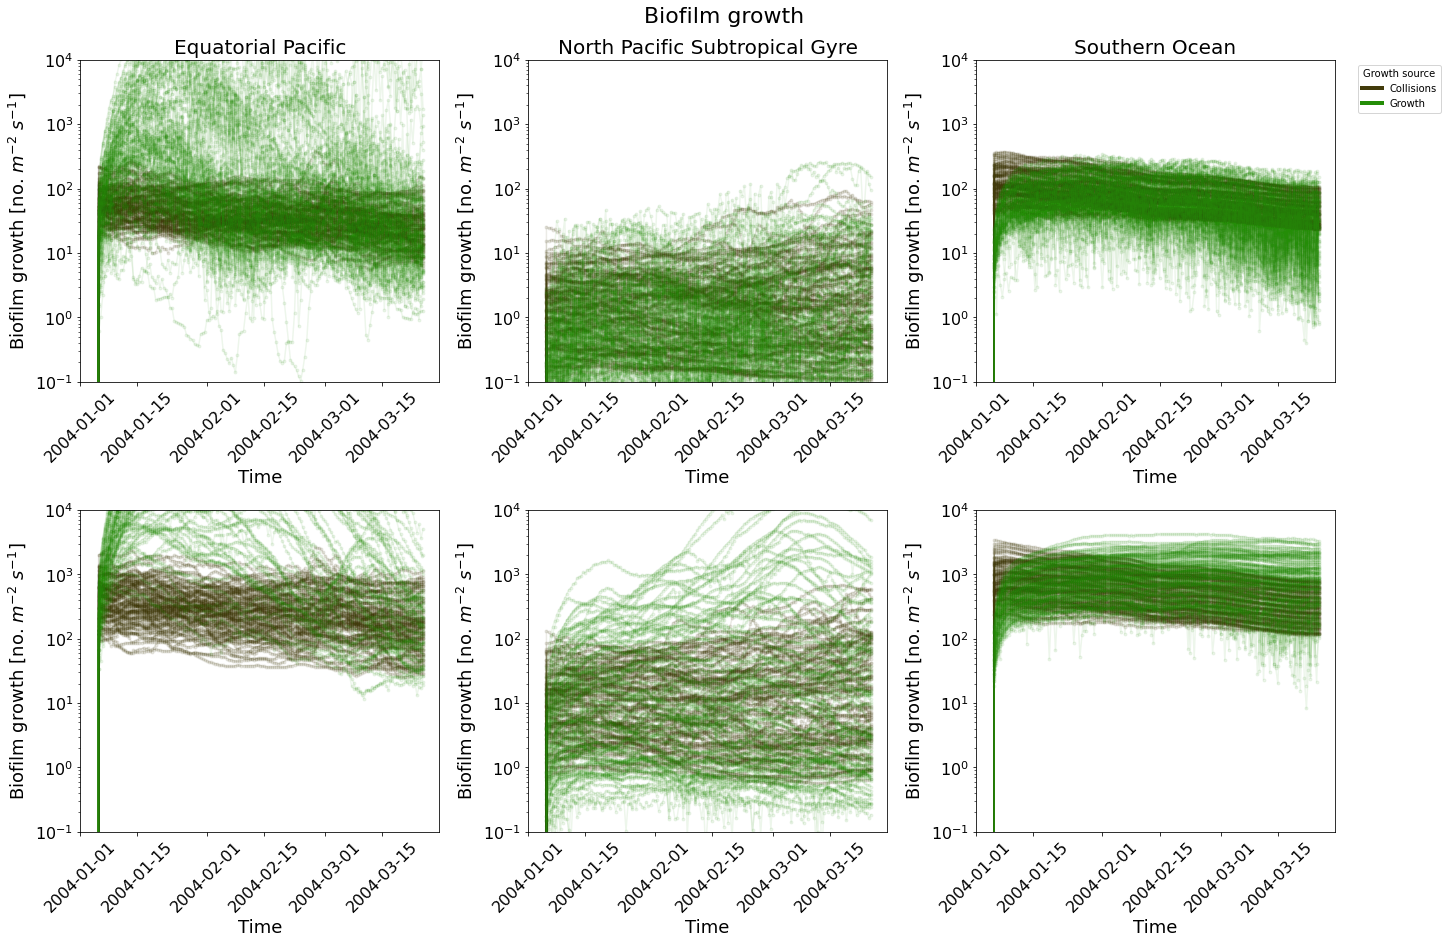

In [69]:
fig = plt.figure(figsize=(20,13),constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=2,figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
# ax3 = fig.add_subplot(gs[2, 0])
# ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
# ax7 = fig.add_subplot(gs[2, 1])
# ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 2])
# ax11 = fig.add_subplot(gs[2, 2])
# ax12 = fig.add_subplot(gs[3, 2])
axes = [[ax1, ax2], [ax5, ax6], [ax9, ax10]]
fig.suptitle('Biofilm growth', fontsize=22)

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        axes[i][k].plot(ds_r[1]['time'].T[:,::f_plt], ds_r[1]['a_coll'].T[:,::f_plt], marker='o', markersize=3,c='#423B0B', alpha = 0.1, label='Collisions')
        axes[i][k].plot(ds_r[1]['time'].T[:,::f_plt], ds_r[1]['a_growth'].T[:,::f_plt], marker='o', markersize=3,c='#248D07', alpha = 0.08, label='Growth')
        axes[i][k].set_ylabel('Biofilm growth [no. $m^{-2}$ $s^{-1}$]', fontsize=18)
        axes[i][k].set_xlabel('Time', fontsize=18)
        axes[i][k].set_yscale('log')
        axes[i][k].set_ylim(1e-1,1e4)
        axes[i][k].tick_params(axis='x', rotation=45)
        axes[i][k].tick_params(axis='both', labelsize=16)
    axes[i][0].set_title(regions[region[i]], fontsize=20)

custom_lines = [Line2D([0], [0], color='#423B0B', lw=4),
                Line2D([0], [0], color='#248D07', lw=4)]

ax9.legend(custom_lines, ['Collisions', 'Growth'], title='Growth source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

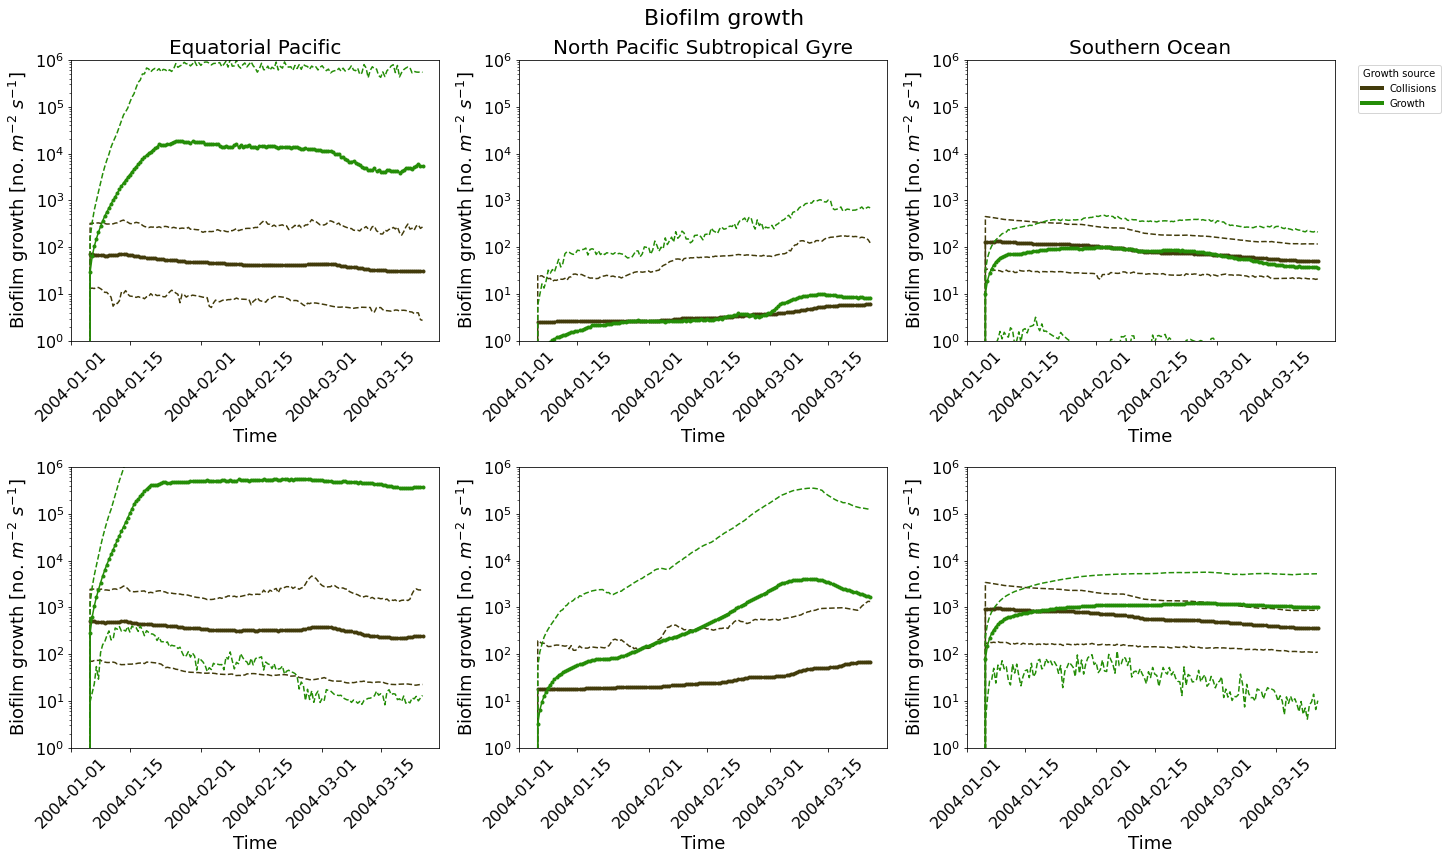

In [36]:
fig = plt.figure(figsize=(20,20),constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=4,figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
# ax3 = fig.add_subplot(gs[2, 0])
# ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
# ax7 = fig.add_subplot(gs[2, 1])
# ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 2])
# ax11 = fig.add_subplot(gs[2, 2])
# ax12 = fig.add_subplot(gs[3, 2])
axes = [[ax1, ax2], [ax5, ax6], [ax9, ax10]]
fig.suptitle('Biofilm growth', fontsize=22)

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        mean_coll = np.mean(ds_r[1]['a_coll'],axis=0)
        max_coll = np.max(ds_r[1]['a_coll'],axis=0)
        min_coll = np.min(ds_r[1]['a_coll'],axis=0)
        mean_growth = np.mean(ds_r[1]['a_growth'],axis=0)
        max_growth = np.max(ds_r[1]['a_growth'],axis=0)
        min_growth = np.min(ds_r[1]['a_growth'],axis=0)
        axes[i][k].plot(ds_r[1]['time'].T[:,0], mean_coll, marker='o', markersize=3,c='#423B0B', label='Mean Collisions')
        axes[i][k].plot(ds_r[1]['time'].T[:,0], max_coll, c='#423B0B', linestyle='dashed',label='Max Collisions')
        axes[i][k].plot(ds_r[1]['time'].T[:,0], min_coll, c='#423B0B', linestyle='dashed',label='Min Collisions')
        axes[i][k].plot(ds_r[1]['time'].T[:,0], mean_growth, marker='o', markersize=3,c='#248D07', label='Growth')
        axes[i][k].plot(ds_r[1]['time'].T[:,0], max_growth, c='#248D07', linestyle='dashed',label='Max Growth')
        axes[i][k].plot(ds_r[1]['time'].T[:,0], min_growth, c='#248D07', linestyle='dashed',label='Min Growth')
        axes[i][k].set_ylabel('Biofilm growth [no. $m^{-2}$ $s^{-1}$]', fontsize=18)
        axes[i][k].set_xlabel('Time', fontsize=18)
        axes[i][k].set_yscale('log')
        axes[i][k].set_ylim(1e0,1e6)
        axes[i][k].tick_params(axis='x', rotation=45)
        axes[i][k].tick_params(axis='both', labelsize=16)
    axes[i][0].set_title(regions[region[i]], fontsize=20)

custom_lines = [Line2D([0], [0], color='#423B0B', lw=4),
                Line2D([0], [0], color='#248D07', lw=4)]

ax9.legend(custom_lines, ['Collisions', 'Growth'], title='Growth source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()

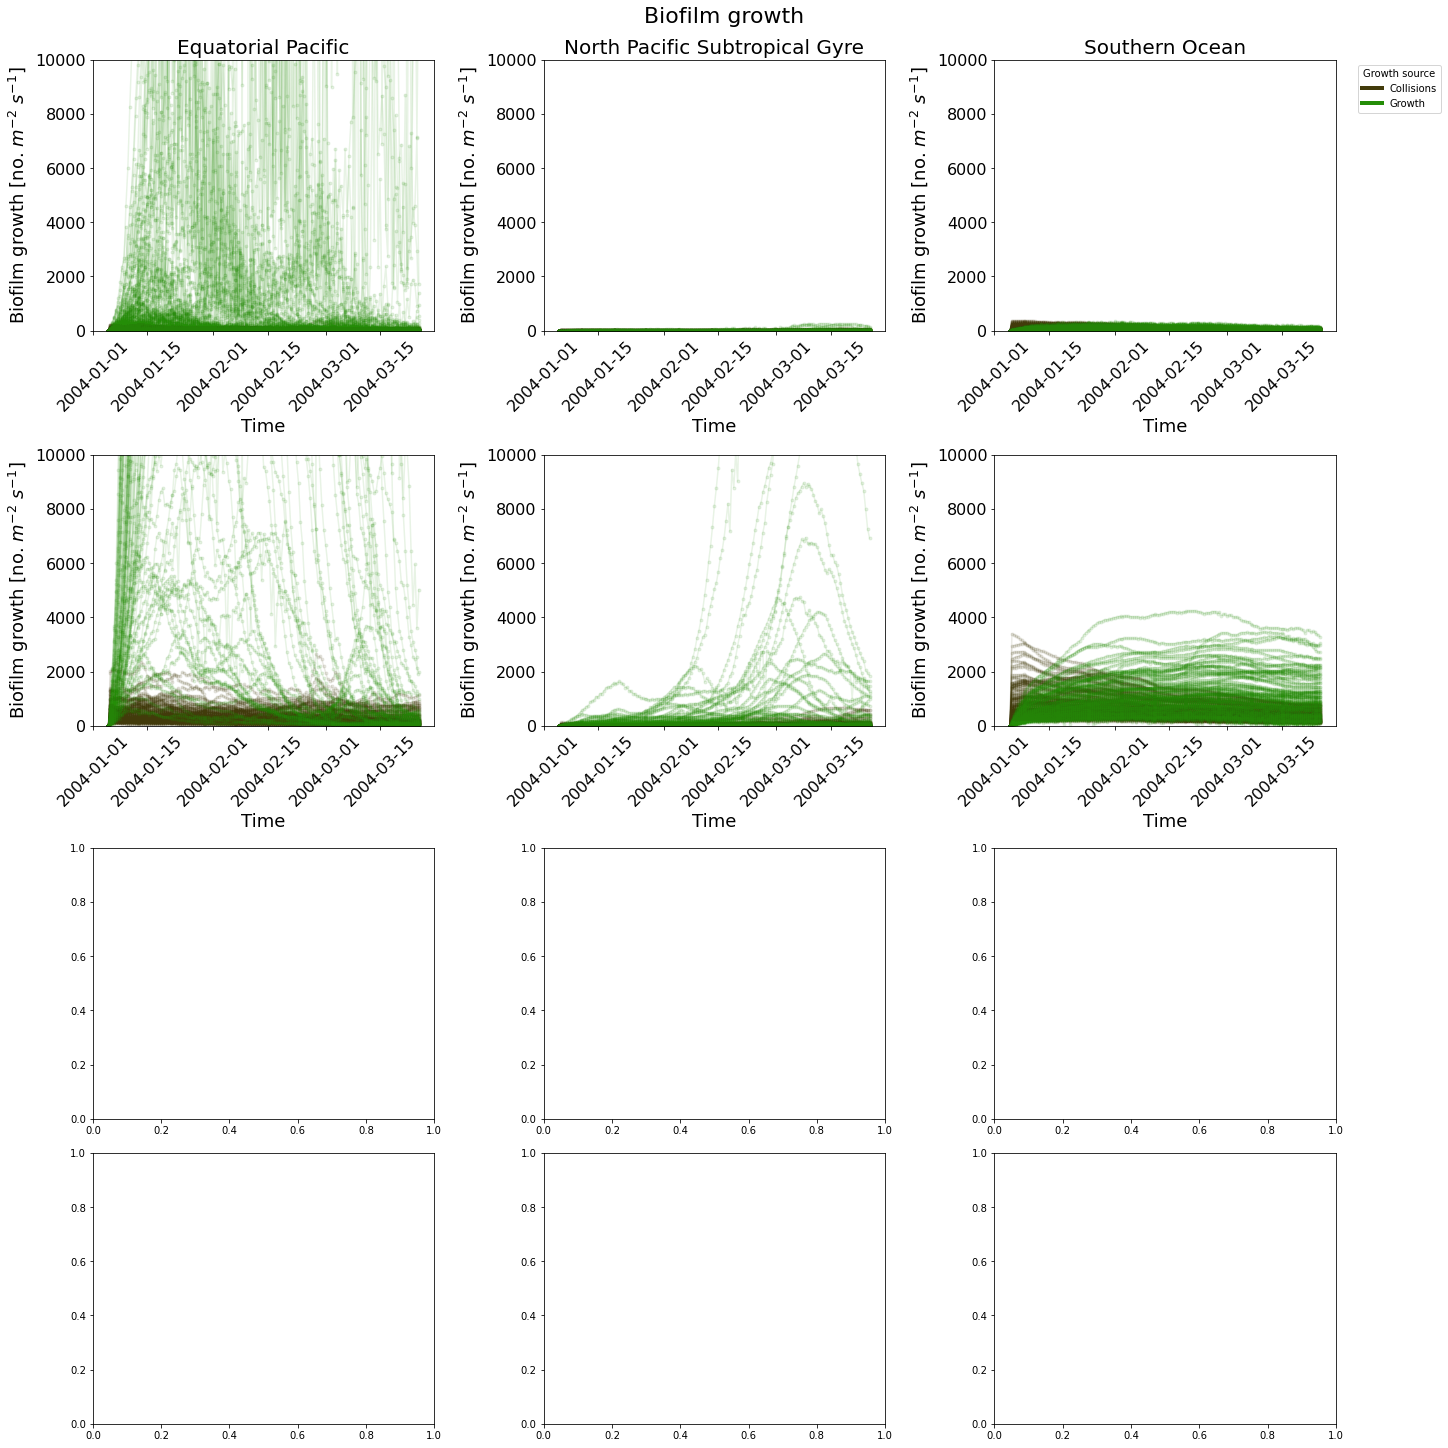

In [31]:
fig = plt.figure(figsize=(20,20),constrained_layout=True)
gs = gridspec.GridSpec(ncols=3, nrows=4,figure=fig)
ax1 = fig.add_subplot(gs[0, 0])
ax2 = fig.add_subplot(gs[1, 0])
ax3 = fig.add_subplot(gs[2, 0])
ax4 = fig.add_subplot(gs[3, 0])
ax5 = fig.add_subplot(gs[0, 1])
ax6 = fig.add_subplot(gs[1, 1])
ax7 = fig.add_subplot(gs[2, 1])
ax8 = fig.add_subplot(gs[3, 1])
ax9 = fig.add_subplot(gs[0, 2])
ax10 = fig.add_subplot(gs[1, 2])
ax11 = fig.add_subplot(gs[2, 2])
ax12 = fig.add_subplot(gs[3, 2])
axes = [[ax1, ax2, ax3, ax4], [ax5, ax6, ax7, ax8], [ax9, ax10, ax11, ax12]]
fig.suptitle('Biofilm growth', fontsize=22)

for i,ds in enumerate(dslist):
    split_ds = list(ds.groupby_bins('r_pl',sizebinedges[::-1]))
    for k, ds_r in enumerate(split_ds):
        axes[i][k].plot(ds_r[1]['time'].T[:,::f_plt], ds_r[1]['a_coll'].T[:,::f_plt], marker='o', markersize=3,c='#423B0B', alpha = 0.1, label='Collisions')
        axes[i][k].plot(ds_r[1]['time'].T[:,::f_plt], ds_r[1]['a_growth'].T[:,::f_plt], marker='o', markersize=3,c='#248D07', alpha = 0.1, label='Growth')
        axes[i][k].set_ylabel('Biofilm growth [no. $m^{-2}$ $s^{-1}$]', fontsize=18)
        axes[i][k].set_xlabel('Time', fontsize=18)
#         axes[i][k].set_yscale('log')
        axes[i][k].set_ylim(-1e-1,1e4)
        axes[i][k].tick_params(axis='x', rotation=45)
        axes[i][k].tick_params(axis='both', labelsize=16)
    axes[i][0].set_title(regions[region[i]], fontsize=20)

custom_lines = [Line2D([0], [0], color='#423B0B', lw=4),
                Line2D([0], [0], color='#248D07', lw=4)]

ax9.legend(custom_lines, ['Collisions', 'Growth'], title='Growth source', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.show()